In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

random_state = 1

data = pd.read_csv("Team_Project_doc_data_19/train_test_2019.csv")
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,18,Private,39302,12th,8,Never-married,Other-service,Own-child,White,Female,0,0,12,United-States,no
1,63,Local-gov,241404,Some-college,10,Divorced,Protective-serv,Not-in-family,White,Female,0,0,35,United-States,no
2,38,Self-emp-inc,312232,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,yes
3,52,Local-gov,230095,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,no
4,27,Private,212895,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,no


In [3]:
list(data.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'y']

In [4]:
X = data[data.columns[:-1]]
y = data.y

In [5]:
cats = ['workclass','marital-status','occupation','relationship','race','sex','native-country']

In [6]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,18,Private,39302,12th,8,Never-married,Other-service,Own-child,White,Female,0,0,12,United-States
1,63,Local-gov,241404,Some-college,10,Divorced,Protective-serv,Not-in-family,White,Female,0,0,35,United-States
2,38,Self-emp-inc,312232,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States
3,52,Local-gov,230095,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States
4,27,Private,212895,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States


In [7]:
dummies = pd.get_dummies(X[cats])
temp = pd.concat([X,dummies],axis=1)
X = temp.drop(cats,axis=1)
X = X.drop('education',axis=1) 
# dropping education, since education-num exists and it's a tree method so ordinal variables are fine

In [8]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,18,39302,8,0,0,12,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,63,241404,10,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,312232,13,0,0,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,52,230095,10,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,27,212895,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [10]:
logistic_regression= LogisticRegression(solver='lbfgs',max_iter=200)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976666666666666


In [11]:
#clf = DecisionTreeClassifier(criterion="entropy",max_depth=5, random_state=random_state)
out = cross_val_score(logistic_regression, X, y, cv=10)
print(out)
print(out.mean())

[0.78121878 0.796      0.795      0.775      0.793      0.789
 0.791      0.794      0.802      0.8008008 ]
0.7917019582019581


### ROC and AUC, maybe

ROC AUC=0.582


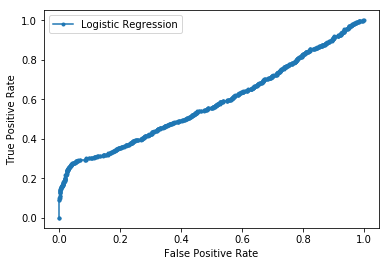

In [12]:
# Binarize data
lb = preprocessing.LabelBinarizer()
pred = logistic_regression.predict_proba(X_test)[:,1]
test = lb.fit_transform(y_test).flatten()

# Compute and plot AUC and ROC curve
lr_auc = metrics.roc_auc_score(test, pred)
print('ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = metrics.roc_curve(test, pred)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [13]:
metrics.confusion_matrix(y_test,y_pred,labels=["no","yes"])

array([[2210,   73],
       [ 534,  183]])